<a href="https://colab.research.google.com/github/u1353279/MetOffice/blob/main/FBprohetforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Little Rissington***



Data Analysis

In [ ]:
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/PHD/little_rissington.xlsx')

In [ ]:
df.head()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Global Radiation (KJ/m2)
0,01/01/2010,0.3,-3.5,-1.60,0.0,10.0,19.0,5425.0
1,02/01/2010,3.9,-3.3,0.30,0.0,8.0,18.0,4761.0
2,03/01/2010,0.9,-2.0,-0.55,0.0,9.0,19.0,5416.0
3,04/01/2010,0.2,-7.7,-3.75,0.2,6.0,10.0,6301.0
4,05/01/2010,-0.1,-6.4,-3.25,8.0,7.0,15.0,2318.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df.rename(columns={'Daily Maximum Temperature (0900-0900) (°C)': 'Max Temp',
                   'Daily Minimum Temperature (0900-0900) (°C)': 'Min Temp',
                  'Daily Mean Temperature (0900-0900) (°C)': 'Mean Temp',
          'Daily Total Rainfall (0900-0900)(mm)': 'Rainfall(mm)',
          'Daily Mean Windspeed (0100-2400) (kn)': 'Windspeed(kn)',
          'Daily Maximum Gust (0100-2400) (kn)': 'Max Gust(kn)',
          'Daily Total Global Radiation (KJ/m2)': 'Radiation(KJ/m2)'},
          inplace=True)

In [ ]:
df.isnull().sum()

Date                 0
Max Temp            17
Min Temp            17
Mean Temp           21
Rainfall(mm)         0
Windspeed(kn)       31
Max Gust(kn)        31
Radiation(KJ/m2)    34
dtype: int64

In [ ]:
# only show the missing values
df[df.filter(like='Max Temp').isnull().any(1)]

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
2478,2016-10-14,NaN,6.7,NaN,0.0,NaN,NaN,NaN
2479,2016-10-15,NaN,NaN,NaN,9.6,NaN,NaN,NaN
2480,2016-10-16,NaN,NaN,NaN,0.2,NaN,NaN,NaN
2481,2016-10-17,NaN,NaN,NaN,1.6,NaN,NaN,NaN
2482,2016-10-18,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2483,2016-10-19,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3500,2019-08-02,NaN,13.8,NaN,0.0,NaN,NaN,NaN
3501,2019-08-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3502,2019-08-04,NaN,NaN,NaN,0.6,NaN,NaN,NaN
3503,2019-08-05,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
#propogate the last valid observation forward
df.ffill()

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
0,2010-01-01,0.3,-3.5,-1.60,0.0,10.0,19.0,5425.0
1,2010-01-02,3.9,-3.3,0.30,0.0,8.0,18.0,4761.0
2,2010-01-03,0.9,-2.0,-0.55,0.0,9.0,19.0,5416.0
3,2010-01-04,0.2,-7.7,-3.75,0.2,6.0,10.0,6301.0
4,2010-01-05,-0.1,-6.4,-3.25,8.0,7.0,15.0,2318.0
...,...,...,...,...,...,...,...,...
3647,2019-12-27,7.5,2.9,5.20,0.4,6.0,15.0,1348.0
3648,2019-12-28,8.5,4.7,6.60,0.0,10.0,20.0,1285.0
3649,2019-12-29,6.9,5.5,6.20,0.0,13.0,23.0,1651.0
3650,2019-12-30,7.6,4.1,5.85,0.0,11.0,20.0,3075.0


In [ ]:
df.ffill(inplace=True)

In [ ]:
df['month'] = df['Date'].dt.month

In [ ]:
df['year'] = df['Date'].dt.year

In [ ]:
import pandas as pd
import numpy as np
import requests
import pytz, datetime
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.sans-serif'] = ['Lucida Console']

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation


In [ ]:
df_1 = pd.DataFrame() 
df_1['ds'] = pd.to_datetime(df['Date']) 
df_1['y'] = df['Radiation(KJ/m2)'] 
df_1.head()

,ds,y
0,2010-01-01,5425.0
1,2010-01-02,4761.0
2,2010-01-03,5416.0
3,2010-01-04,6301.0
4,2010-01-05,2318.0


In [ ]:
m = Prophet() 
m.fit(df_1) 

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12 * 5, freq='M') 

In [ ]:
future

,ds
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05
...,...
3707,2024-08-31
3708,2024-09-30
3709,2024-10-31
3710,2024-11-30


In [ ]:
forecast = m.predict(future) 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
3707,2024-08-31,13827.125954,8235.221149,19556.818013,10978.894822,10782.550684,11177.258013
3708,2024-09-30,8833.812124,2831.263814,14668.705449,10984.979491,10784.823494,11189.674684
3709,2024-10-31,4920.398964,-996.082099,10212.365643,10991.266982,10783.903944,11203.228587
3710,2024-11-30,3203.474639,-2524.424928,8975.737422,10997.351651,10784.508818,11213.207840
3711,2024-12-31,2639.156498,-3161.159084,8491.528406,11003.639142,10786.463979,11222.869279


ds=the time series data.
yhat= the prediction,
yhat_lower and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels).
trend= the long term growth, shrink or stagnancy of the data, trend_lower and trend_upper are the uncertainty levels.

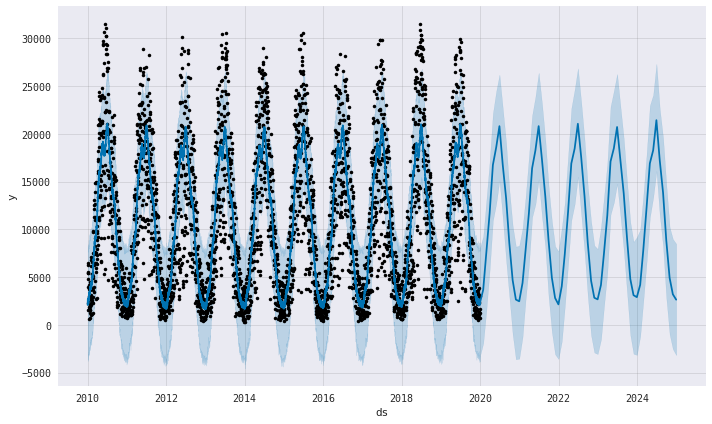

In [ ]:
fig1 = m.plot(forecast) 

The image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data. In the last five years, there is no “actual” data only predicted.

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,10722.212564,-3601.909858,8321.854390,10722.212564,10722.212564,-8640.365316,-8640.365316,-8640.365316,-304.544479,-304.544479,-304.544479,-8335.820838,-8335.820838,-8335.820838,0.0,0.0,0.0,2081.847248
1,2010-01-02,10721.595327,-3224.775190,8460.204512,10721.595327,10721.595327,-8189.417813,-8189.417813,-8189.417813,146.151073,146.151073,146.151073,-8335.568886,-8335.568886,-8335.568886,0.0,0.0,0.0,2532.177514
2,2010-01-03,10720.978089,-3066.831165,8426.769540,10720.978089,10720.978089,-8029.519833,-8029.519833,-8029.519833,300.701425,300.701425,300.701425,-8330.221258,-8330.221258,-8330.221258,0.0,0.0,0.0,2691.458256
3,2010-01-04,10720.360852,-3218.627130,8131.947283,10720.360852,10720.360852,-8432.409237,-8432.409237,-8432.409237,-113.312927,-113.312927,-113.312927,-8319.096310,-8319.096310,-8319.096310,0.0,0.0,0.0,2287.951614
4,2010-01-05,10719.743614,-3776.669328,7636.278693,10719.743614,10719.743614,-8332.972224,-8332.972224,-8332.972224,-31.368179,-31.368179,-31.368179,-8301.604045,-8301.604045,-8301.604045,0.0,0.0,0.0,2386.771390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,2024-08-31,10978.894822,8235.221149,19556.818013,10782.550684,11177.258013,2848.231132,2848.231132,2848.231132,146.151073,146.151073,146.151073,2702.080059,2702.080059,2702.080059,0.0,0.0,0.0,13827.125954
3708,2024-09-30,10984.979491,2831.263814,14668.705449,10784.823494,11189.674684,-2151.167367,-2151.167367,-2151.167367,-113.312927,-113.312927,-113.312927,-2037.854440,-2037.854440,-2037.854440,0.0,0.0,0.0,8833.812124
3709,2024-10-31,10991.266982,-996.082099,10212.365643,10783.903944,11203.228587,-6070.868018,-6070.868018,-6070.868018,93.608677,93.608677,93.608677,-6164.476695,-6164.476695,-6164.476695,0.0,0.0,0.0,4920.398964
3710,2024-11-30,10997.351651,-2524.424928,8975.737422,10784.508818,11213.207840,-7793.877012,-7793.877012,-7793.877012,146.151073,146.151073,146.151073,-7940.028085,-7940.028085,-7940.028085,0.0,0.0,0.0,3203.474639
